# 利用tweepy来收集twitter数据

## 缘起

原来一开始有这么一句“我认为正文应该从这里开始。 :-)”

可问题是: 几个月之后，我都不明白这句话的意思了。 :-P 看来，文档的备注，程序的注释都是非常有用的。

我的兴趣点是在不断转化，最终多亏了有效的记录工具——markdown，才把之前的经验进行了有效保留，而没有浪费掉。

中间没有做有效的版本控制，所以地理位置筛选选项一加入，从twitter上基本就抓不到数据了。而且不知怎么回事儿，之前跑的结果数据和图形也都不见了，导致我没有办法偷懒。只好依照教程重新进行修订。不过也好，正好把tweepy的使用充实一下。这将给我的2篇论文带来主体的内容。

## 准备工作

2013年年末，我发现了mtsw一书，后来该书依靠vagrant出了新版，非常好用。只是不知为何，我就是读不下去。后来发现了youtube上面的tweepy教程，比起mtsw一书当中使用的twitter模块，我觉得tweepy实际上更好用一些。最大的特点在于非常简化。

这里可以看到对于流数据的搜集，首先需要import几个模块，主要是流、流的监听，以及开放验证。

然后就是把我的一些twitter 应用信息填写了进去，这些属于私有信息。

In [1]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
import json
from my_twitter import *




之后我们要做的就是面向对象里面最常见的东西了，通过重写类的内容来达到具体目的。这里参考[Collecting Twitter Data: Using a Python Stream Listener](http://stats.seandolinar.com/collecting-twitter-data-using-a-python-stream-listener/)一文，写得非常详细。

In [5]:
class listener(StreamListener):
    def __init__(self, tweets, limit = 1000):
        self.tweets = tweets  #save the collected tweets in this list named tweets, effect on the outer tweets list
        self.limit = limit # by default, collect 1000 tweets
        
    def on_data(self, data):
        try:
            self.tweets.append(json.loads(data))
            print "tweets collected #", len(self.tweets)
            if len(self.tweets) >= self.limit:
                return False
            
        except BaseException, e:
            time.sleep(5)
            return True
        
        
    def on_error(self, status):
        print status

In [6]:
keyword_list = ["twitter"]
tweets = []

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

twitterStream = Stream(auth, listener(tweets, 10))
twitterStream.filter(track=keyword_list, languages=['en'])

ConnectionError: HTTPSConnectionPool(host='stream.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/filter.json?delimited=length (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x7f9e34292c50>: Failed to establish a new connection: [Errno 110] Connection timed out',))

In [ ]:
tweets

In [62]:
class geo_listener(StreamListener):
    def __init__(self, tweets, limit = 1000):
        self.tweets = tweets  #save the collected tweets in this list named tweets, effect on the outer tweets list
        self.limit = limit # by default, collect 1000 tweets
        
    def on_data(self, data):
        try:
            json_data = json.loads(data)
            if 'geo' in json_data and json_data['geo']: #contains geo information in tweet
                self.tweets.append(json_data)
                print "tweets collected #", len(self.tweets)
            if len(self.tweets) >= self.limit:
                return False
            
        except BaseException, e:
            time.sleep(5)
            return True
        
        
    def on_error(self, status):
        print status

In [49]:
tweets = []

由于tweepy只提供了对于stream的filter功能，而且还不允许不加入参数。那么怎么办呢？好在万能的stackoverflow网站上面，有人给出了解答。例如locations进行filter，把范围写成[-180, -90, 180, 90]，也就是整个世界。于是所有的tweets无一例外，尽入彀中矣。

In [63]:
keyword_list = ["twitter"]


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

twitterStream = Stream(auth, geo_listener(tweets, limit = 10000))
twitterStream.filter(locations=[-180,-90,180,90])

tweets collected # 6099
tweets collected # 6100
tweets collected # 6101
tweets collected # 6102
tweets collected # 6103
tweets collected # 6104
tweets collected # 6105
tweets collected # 6106
tweets collected # 6107
tweets collected # 6108
tweets collected # 6109
tweets collected # 6110
tweets collected # 6111
tweets collected # 6112
tweets collected # 6113
tweets collected # 6114
tweets collected # 6115
tweets collected # 6116
tweets collected # 6117
tweets collected # 6118
tweets collected # 6119
tweets collected # 6120
tweets collected # 6121
tweets collected # 6122
tweets collected # 6123
tweets collected # 6124
tweets collected # 6125
tweets collected # 6126
tweets collected # 6127
tweets collected # 6128
tweets collected # 6129
tweets collected # 6130
tweets collected # 6131
tweets collected # 6132
tweets collected # 6133
tweets collected # 6134
tweets collected # 6135
tweets collected # 6136
tweets collected # 6137
tweets collected # 6138
tweets collected # 6139
tweets collected

收集一次tweets时间太长了，特别是用filter的情况下。为了保留我们获得的数据（一个叫做tweets的dict），我们把它串行化并且输出为json格式文件。

In [64]:
import json
with open('tweets.json', 'w') as fp:
    json.dump(tweets, fp)

我们来试着读取一遍，把它赋值给新的列表变量tweets1

In [1]:
import simplejson as json
with open("tweets.json") as tweetfile:
    tweets = json.load(tweetfile)

读取成功。我们来打印一下tweets1。但是似乎直接打印乱七八糟的，我们还是调整一下输出格式。让它输出得好看一些吧。

In [65]:
#print json.dumps(tweets1, indent=4, sort_keys = True)

In [2]:
import pandas as pd
df = pd.DataFrame(tweets)
df['geo'].head()

0    {u'type': u'Point', u'coordinates': [-7.12762,...
1    {u'type': u'Point', u'coordinates': [-1.346996...
2    {u'type': u'Point', u'coordinates': [17.960745...
3    {u'type': u'Point', u'coordinates': [-6.2399, ...
4    {u'type': u'Point', u'coordinates': [-7.81851,...
Name: geo, dtype: object

In [12]:
for i in range(20):
    print df.ix[i].user['id']

468999968
221370501
2772379827
101533050
510161583
3355430007
631053246
434006188
1147579244
3081316862
288521442
160736366
247811919
50029560
2972202212
2273084898
2170212967
2561144611
1398809318
1693227686


In [9]:
df.columns

Index([u'contributors', u'coordinates', u'created_at', u'entities',
       u'extended_entities', u'favorite_count', u'favorited', u'filter_level',
       u'geo', u'id', u'id_str', u'in_reply_to_screen_name',
       u'in_reply_to_status_id', u'in_reply_to_status_id_str',
       u'in_reply_to_user_id', u'in_reply_to_user_id_str', u'lang', u'place',
       u'possibly_sensitive', u'quoted_status', u'quoted_status_id',
       u'quoted_status_id_str', u'retweet_count', u'retweeted', u'scopes',
       u'source', u'text', u'timestamp_ms', u'truncated', u'user'],
      dtype='object')

In [10]:
df1 = df[['id', 'text', 'lang', 'place', 'coordinates', 'created_at']]

编写两个函数，分别从每一行里面萃取longitude和latitude。复习一下英语和地理哈，longitude是经度，范围[-180, 180]，latitude是维度，范围[-90, 90]

In [11]:
def get_longitude(row):
    #return row['coordinates']['coordinates'][0], row['coordinates']['coordinates'][1]
    return row['coordinates']['coordinates'][0]
def get_latitude(row):
    return row['coordinates']['coordinates'][1]
#def get_long_lat(row):
    

In [12]:
df1.loc[:,'longitude'] = df1.apply(get_longitude, axis = 1)
df1.loc[:,'latitude'] = df1.apply(get_latitude, axis = 1)

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
df1.head()

id                                               text lang  \
0  623052969177583616                                       @BdS_Q kakak   sl   
1  623052968930230272  Just posted a photo @ Painan, Kab. Pesisir Sel...   in   
2  623052970469359616                             Late nigth speck boy💪   en   
3  623052970146398208  With Christopher, Bernike Esterrina, and 50 ot...   en   
4  623052971023020032  Mngn trs😂😂 (at Ajam Goreng Spesial Lombok Id...   in   

                                               place  \
0  {u'country_code': u'ID', u'url': u'https://api...   
1  {u'country_code': u'ID', u'url': u'https://api...   
2  {u'country_code': u'MX', u'url': u'https://api...   
3  {u'country_code': u'ID', u'url': u'https://api...   
4  {u'country_code': u'ID', u'url': u'https://api...   

                                         coordinates  \
0  {u'type': u'Point', u'coordinates': [113.43628...   
1  {u'type': u'Point', u'coordinates': [100.56754...   
2  {u'type': u'Point', u'coordinates': [-92.95122...   
3  {u'type': u'Point', u'coordinates': [106.82137...   
4  {u'type': u'Point', u'coordinates': [112.01904...   

                       created_at   longitude   latitude  
0  Mon Jul 20 08:52:58 +0000 2015  113.436280  -7.127620  
1  Mon Jul 20 08:52:58 +0000 2015  100.567545  -1.346996  
2  Mon Jul 20 08:52:58 +0000 2015  -92.951228  17.960745  
3  Mon Jul 20 08:52:58 +0000 2015  106.821370  -6.239900  
4  Mon Jul 20 08:52:58 +0000 2015  112.019040  -7.818510

下面这一段是抄来的，用来在世界地图上面显示tweets的来源位置。 :-P 要是想让它运行，还必须
```bash
git clone https://github.com/chdoig/scipy2015-blaze-bokeh.git
```
然后把data, app, utils这3个文件夹拷贝到本文件夹下面。


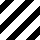
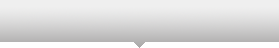
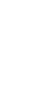
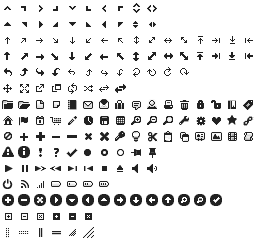
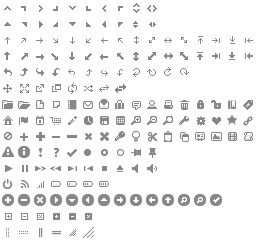
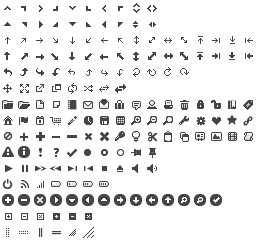
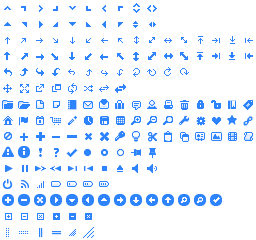
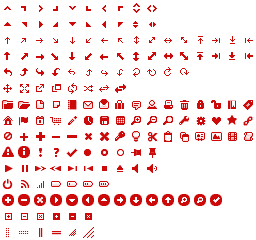
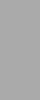
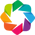
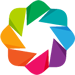
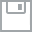
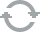
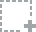
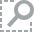
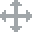
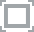
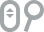

In [18]:
import utils.world_countries as wc
world_countries = wc.data.copy()

import pandas as pd
from bokeh.plotting import figure, show, output_notebook

# Process data
worldmap = pd.DataFrame.from_dict(world_countries, orient='index')

# Output option
output_notebook()

# Create your plot
p = figure(plot_height=500, plot_width=900, toolbar_location="left",
    x_axis_type=None, y_axis_type=None)

p.patches(xs=worldmap['lons'], ys=worldmap['lats'], fill_color="white", fill_alpha=0,
    line_color="black", line_width=0.5)

# begin of wsy code
from bokeh.models import ColumnDataSource
tweets_source = ColumnDataSource(df1)

p.scatter(x="longitude", y="latitude", source=tweets_source)

# end of wsy code

# Show plot
show(p)

一次成功，哈哈。看来顺序确实是[经度,维度]

In [108]:
#from blaze import scatter


from datetime import datetime, date

import utils.world_countries as wc
from bokeh.plotting import *
from bokeh.objects import HoverTool, ColumnDataSource
from collections import OrderedDict

#output_file('world_map.html')
output_notebook()

world_countries = wc.data.copy()

tweets_source = ColumnDataSource(df1)

countries_source = ColumnDataSource(data= dict(
    countries_xs=[world_countries[code]['lons'] for code in world_countries],
    countries_ys=[world_countries[code]['lats'] for code in world_countries],
    country = [world_countries[code]['name'] for code in world_countries],
))
TOOLS="pan,wheel_zoom,box_zoom,reset,resize,hover,save"

figure(
    #title="%s tweets on %s" %(str(len(df.index)),str(date(year, month, day))),
    title_text_font_size="20pt",
    plot_width=1000,
    plot_height=600,
)

patches(xs="countries_xs", ys="countries_ys", source = countries_source, fill_color="#999999", fill_alpha=0.4, tools=TOOLS,
        line_color="#999999", line_width=1)

hold()

scatter(x="longitude", y="latitude", source=tweets_source)
hover = [t for t in curplot().tools if isinstance(t, HoverTool)][0]



show()

ImportError: No module named objects

In [25]:
print tweets[0]['geo']

None


In [ ]:
class listener(StreamListener):
    
    def __init__(self, start_time, time_limit = 60):
        self.time = start_time
        self.limit = time_limit
        
    def on_data(self, data):
        while (time.time() - self.time) < self.limit:
            try:
                saveFile = open('raw_tweets.json', 'a')
                saveFile.write(data)
                saveFile.write('\n')
                saveFile.close()
                
                return True
            except BaseException, e:
                print 'failed ondata,', str(e)
                time.sleep(5)
                pass
            
        exit()
    def on_error(self, status):
        print status

In [ ]:
import os
import time
start_time = time.time() # 获得系统当前时间
keyword_list = ["twitter"]

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

twitterStream = Stream(auth, listener(start_time, time_limit = 20))
twitterStream.filter(track=keyword_list, languages=['en'])

In [12]:
import json
raw_json_file = open('raw_tweets.json', 'r')
for line in raw_json_file:
    content = json.loads(line)
    print content
    #if 'geo' in content:
    #    print content['geo']


{u'contributors': None, u'truncated': False, u'text': u'RT @cdiddy513: "I got hynpotiq, exotic, this polo on my body..." http://t.co/tc0vGNp8ax', u'in_reply_to_status_id': None, u'id': 621963692230504448, u'favorite_count': 0, u'source': u'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', u'retweeted': False, u'coordinates': None, u'timestamp_ms': u'1437122674411', u'entities': {u'symbols': [], u'media': [{u'source_status_id_str': u'580496536410423296', u'expanded_url': u'http://twitter.com/pettynextdoor_/status/580496536410423296/photo/1', u'display_url': u'pic.twitter.com/tc0vGNp8ax', u'url': u'http://t.co/tc0vGNp8ax', u'media_url_https': u'https://pbs.twimg.com/media/CA5WglnWgAAoLrv.jpg', u'source_status_id': 580496536410423296, u'id_str': u'580496519830339584', u'sizes': {u'small': {u'h': 453, u'resize': u'fit', u'w': 340}, u'large': {u'h': 1024, u'resize': u'fit', u'w': 768}, u'medium': {u'h': 800, u'resize': u'fit', u'w': 600}, u'thumb': {u'h': 

ValueError: No JSON object could be decoded

这里我需要定义一个自己的类来处理收到数据或者出现问题。看到很多教程里面，都不是on_data，而是用的on_status，颇有些不明觉历。注意这里我们使用json来对数据进行第一步处理。因为不是所有的数据类目都需要存储，也不是所有的数据都符合我们的筛选需要。本例中我们首先使用json.loads对数据进行格式化，生成的就是json了。这东西操作起来容易许多，可以使用json_data['text'], json_data['geo']等直接拿到需要的数据属性。不过这里还有一个问题，如果我们打算收集所有包含地理信息的数据的话，不能够只要求json_data['geo']不为None，还必须保证包含json_data['geo']这一项，因此判断句是一个“与”关系。

我们打算要其中几项数据，包含 'user_id', 'user_screen_name', 'text','created_at', 'longitude', 'latitude', 'date'， 存到哪里呢？我觉得一个csv文件就可以了。但是事实证明，远远不是name简单。就是一个utf8编码问题，就一直过不去了。最后我被逼无奈，只好选择使用sqlite来存储。网上一堆相关讨论区的东西，可是真正拿出来才发现，一堆错误。我只好反复比对原始code以及后面的回复、注释里面的code总算是搞定了存储。

这里首先是编写了一个函数，用来转换时间格式的。初始tweepy获得的stream 中，created_at时间格式为"Nov 12 ... 2014" 这样不好转换，因此这里一步转换成为 "2014-12-01 02:43:27"这样的格式

In [ ]:
import time

def stdTime(twitterCreatedAt):
    return str(time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(twitterCreatedAt,'%a %b %d %H:%M:%S +0000 %Y')))

最难说的一部分，首先是那些数据库的操作。注意未必一定要把旧的表丢掉，有新的东西继续往里面填写也就可以了。这样我随时可以停止，也随时可以继续累积数据。不过如果没有确定下来每一项的内容，或者确定下来却要发生变更就比较麻烦了。我想这也就是结构化和非结构化数据库在这里应用的最大差异了吧。注意on_data里面的数据操作。首先获得指针，往里面添加东西，然后别忘了commit。之前一直打开是空的，就是因为没有进行commit操作。插入数据的时候不需要excutemany，网上留言那家伙也就是个rookie而已。害得我误入歧途好久。

In [ ]:
import json
import csv
#import codecs
import sqlite3 as lite

sqlite3file='twitterDB.db'

con = lite.connect(sqlite3file)
cur = con.cursor()
#cur.execute("DROP TABLE IF EXISTS TWEETS")
cur.execute("CREATE TABLE IF NOT EXISTS TWEETS(user_id text, user_screen_name text, text text, created_at text, longitude real, latitude real, date text)")


class StdOutListener(StreamListener):
    """ A listener handles tweets are the received from the stream.
    This is a basic listener that just prints received tweets to stdout.

    """
    def on_data(self, data):
        #saveFile = open('twitterDB.json', 'a')
        #saveFile.write(json.dumps(data))
        #saveFile.close()
        #print(json.dumps(data))
        json_data = json.loads(data)        
        if 'geo' in json_data and json_data['geo']:
            save_tweet = {}
            save_tweet['user_id'] = str(json_data['user']['id'])
            save_tweet['user_screen_name'] = json_data['user']['screen_name']
            #save_tweet['text'] = json_data['text'].encode('utf-8')
            save_tweet['text'] = json_data['text']
            save_tweet['created_at'] = stdTime(json_data['created_at'])
            save_tweet['longitude'] = json_data['geo']['coordinates'][1]
            save_tweet['latitude'] = json_data['geo']['coordinates'][0]
            save_tweet['date'] = stdTime(json_data['created_at']).split(' ')[0]
            print save_tweet
            cur = con.cursor()
            cur.execute("INSERT INTO TWEETS VALUES(?,?,?,?,?,?,?)", (save_tweet['user_id'],
                                                                         save_tweet['user_screen_name'],
                                                                         save_tweet['text'],
                                                                         save_tweet['created_at'],
                                                                         save_tweet['longitude'],
                                                                         save_tweet['latitude'],
                                                                         save_tweet['date']))
            con.commit()
            #saveFile = open('twitterDB.json', 'ab')
            #wr = csv.writer(saveFile, dialect='excel')
            #wr.writerow(RESULT)
            #wr.writerow([unicode(str(s)).encode("utf-8") for s in save_tweet])
            #saveFile = codecs.open('twitterDB.json', 'a', 'utf-8')
            #for item in save_tweet:
            #    saveFile.write(str(item))
            #    saveFile.write(',')
            #saveFile.write('\n')
            #saveFile.close()
            #print json_data['geo']['coordinates']
        #print json.dumps(json.loads(data), indent=1)
        return True

    def on_error(self, status):
        print status




我们来看看趋势，最近什么tag最为流行：

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = API(auth)
trends1 = api.trends_place(1) # from the end of your code
# trends1 is a list with only one element in it, which is a 
# dict which we'll put in data.
data = trends1[0] 
# grab the trends
trends = data['trends']
# grab the name from each trend
names = [trend['name'] for trend in trends]
# put all the names together with a ' ' separating them
trendsName = ' '.join(names)
print(trendsName)

然后就是见证奇迹的时刻了

In [ ]:
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

stream = Stream(auth, l)
#stream.filter(track=['python'])

blaze的那些例子里面，统统都是直接 df = Data(...) 就可以了。但我实际操作，无一次成功。好在曲径通幽，换个方法。先弄成一个表格。这里使用Table函数来操作。但是注意获得的这个tweets并不是DataFrame。还得加上一步利用blaze的into转换为dataframe，以便于后面的可视化部分操作使用。

In [ ]:
from blaze import *

tweets = Table('sqlite:///twitterDB.db::TWEETS')
tweets
df = into(DataFrame(), tweets)

In [ ]:
from blaze import *


from datetime import datetime, date

import world_countries as wc
from bokeh.plotting import *
from bokeh.objects import HoverTool, ColumnDataSource
from collections import OrderedDict

#output_file('world_map.html')
output_notebook()

world_countries = wc.data.copy()

tweets_source = ColumnDataSource(df)

countries_source = ColumnDataSource(data= dict(
    countries_xs=[world_countries[code]['lons'] for code in world_countries],
    countries_ys=[world_countries[code]['lats'] for code in world_countries],
    country = [world_countries[code]['name'] for code in world_countries],
))
TOOLS="pan,wheel_zoom,box_zoom,reset,resize,hover,save"

figure(
    #title="%s tweets on %s" %(str(len(df.index)),str(date(year, month, day))),
    title_text_font_size="20pt",
    plot_width=1000,
    plot_height=600,
)

patches(xs="countries_xs", ys="countries_ys", source = countries_source, fill_color="#999999", fill_alpha=0.4, tools=TOOLS,
        line_color="#999999", line_width=1)

hold()

scatter(x="longitude", y="latitude", source=tweets_source)
hover = [t for t in curplot().tools if isinstance(t, HoverTool)][0]



show()

从上图中可以得出的结论是，美国人比起南美和欧洲人更注重隐私保护。要进一步取得这个结论，就得积累一定量的数据，然后计算其中包含地理信息的条目/总条目数。如果这个比例很小，那么就可以得出大部分人对隐私注重保护，而不注重保护的那些人在哪儿呢？往地图上面一看，一目了然。这也就是所谓信息可视化的最重要作用——适合于人类的思维。

In [ ]:
#这个是保存成csv文件的。能用，只是存储编码的时候出了一些问题。我于是转向sqlite存储。这里先保留一下快照

import json
import csv
import codecs

class StdOutListener(StreamListener):
    """ A listener handles tweets are the received from the stream.
    This is a basic listener that just prints received tweets to stdout.

    """
    def on_data(self, data):
        #saveFile = open('twitterDB.json', 'a')
        #saveFile.write(json.dumps(data))
        #saveFile.close()
        #print(json.dumps(data))
        json_data = json.loads(data)        
        if 'geo' in json_data and json_data['geo']:
            save_tweet = []
            save_tweet.append(json_data['user']['id'])
            save_tweet.append(json_data['user']['screen_name'])
            save_tweet.append(json_data['text'].encode('utf-8'))
            save_tweet.append(stdTime(json_data['created_at']))
            save_tweet.append(json_data['geo']['coordinates'][0])
            save_tweet.append(json_data['geo']['coordinates'][1])
            save_tweet.append(stdTime(json_data['created_at']).split(' ')[0])
            print save_tweet
            saveFile = open('twitterDB.json', 'a')
            wr = csv.writer(saveFile, dialect='excel')
            #wr.writerow(RESULT)
            wr.writerow([unicode(str(s)).encode("utf-8") for s in save_tweet])
            #saveFile = codecs.open('twitterDB.json', 'a', 'utf-8')
            #for item in save_tweet:
            #    saveFile.write(str(item))
            #    saveFile.write(',')
            #saveFile.write('\n')
            #saveFile.close()
            #print json_data['geo']['coordinates']
        #print json.dumps(json.loads(data), indent=1)
        return True

    def on_error(self, status):
        print status




In [ ]:
import json

class StdOutListener(StreamListener):
    """ A listener handles tweets are the received from the stream.
    This is a basic listener that just prints received tweets to stdout.

    """
    def on_data(self, data):
        json_data = json.loads(data)
        saveFile = open('twitterDB.json', 'a')
        saveFile.write(json.dumps(json_data, indent=2))
        saveFile.close()
        #print(json.dumps(data))
                
        
            #print json_data['geo']['coordinates']
        #print json.dumps(json.loads(data), indent=1)
        return True

    def on_error(self, status):
        print status




In [ ]:
import tweepy

consumer_key = '7nR7F9Y6A6vi77NtBi4hg'
consumer_secret ='YRW8wb39PKIgPOGp7b9rJCL3r2NwpJTsxF6A4ezM'
access_token = '20567308-AqeaRO4zsg45qRhli2JLbPBycfNgFEFj93467WpG3'
access_token_secret = 'mGwfHW8ZXcUro20Gtc3xdFJFrghCSfVy6ga55XfQ0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print tweet.text

In [ ]:
# Get the User object for twitter...
user = tweepy.api.get_user('twitter')

In [ ]:
import tweepy

consumer_key = '7nR7F9Y6A6vi77NtBi4hg'
consumer_secret ='YRW8wb39PKIgPOGp7b9rJCL3r2NwpJTsxF6A4ezM'
access_token = '20567308-AqeaRO4zsg45qRhli2JLbPBycfNgFEFj93467WpG3'
access_token_secret = 'mGwfHW8ZXcUro20Gtc3xdFJFrghCSfVy6ga55XfQ0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# here's where you went wrong (tried and tested), should be
#results = api.search(geocode='50,50,5mi')
# try with the following lat long
results = api.search(geocode='39.833193,-94.862794,5mi') 

for result in results:
    print result.text
    print result.location if hasattr(result, 'location') else "Undefined location"

In [ ]:
auth = tweepy.OAuthHandler("consumer_key", "consumer_secret")

# Redirect user to Twitter to authorize
redirect_user(auth.get_authorization_url())

# Get access token
auth.get_access_token("verifier_value")

# Construct the API instance
api = tweepy.API(auth)

In [ ]:
mydict = {'geo':'smart'}
'geo' in mydict

In [1]:
a = ['a', 'b']
b = a
print b
a.pop()
print a
print b

['a', 'b']
['a']
['a']
